In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


In [2]:
#invite people for the Kaggle party
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv')
sample_df=pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
df.shape

(98000, 30)

In [6]:
df.describe(include='all')

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102,0.003413,-0.002639,0.005404,0.001656,-0.005399,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077,0.998940,1.001096,1.003277,1.001258,0.995965,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.377021,-4.535903,-4.182233,-4.468930,-4.149688,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,-0.671810,-0.677757,-0.671055,-0.672635,-0.680243,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000,0.003536,-0.004299,0.006535,0.001663,-0.001574,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000,0.678679,0.673859,0.680903,0.673174,0.666996,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000,4.490521,4.270708,4.157538,4.230849,4.710316,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [7]:
import plotly.express as px
df.drop('id', axis=1).describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
f_00,98000.000000,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.000000,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.000000,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.000000,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.000000,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.000000,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.000000,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.000000,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.000000,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.000000,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [8]:
# pxを使用しての色の指定（下記パレットの、”Pastel”の4番目の色を指定していることがわかる）
#　color=px.colors.qualitative.Pastel[4]
import plotly.express as px
 
fig = px.colors.qualitative.swatches()
fig.show()
# https://oeconomicus.jp/2021/07/plotly-color-scale/
# 他にもたくさんのカラースケールがある

In [9]:
# any missing values
print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(df.shape[0], df.shape[1],df.isna().sum().sum(), df.duplicated().sum()))

Data Shape: There are 98,000 rows and 30 columns.
Missing values = 0, Duplicates = 0.



Quick insights:
1) Total 28 colums in this dataset<br>
2) Columns F7-F13 seems to have large values when compared to others. May be these columns are categorical data.<br>
3) we need to apply scaling before clustering.

<AxesSubplot:>

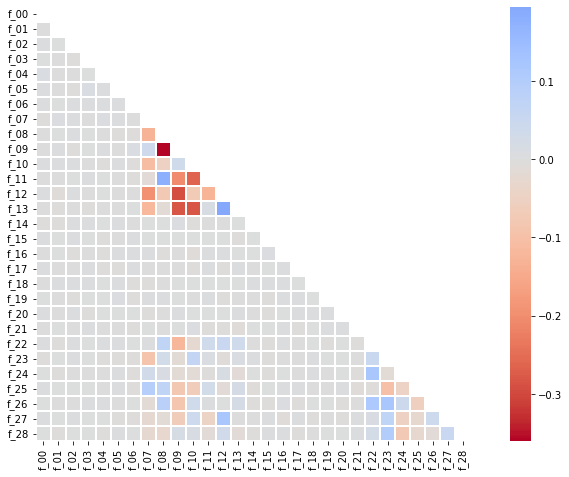

In [10]:
#Correlation
fig, ax = plt.subplots(figsize=(14,8))
corr_mat = df.drop(["id"], axis=1).corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
# https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html
# numpy.triu_indices_from(arr, k=0)
# Return the indices for the upper-triangle of arr.
sns.heatmap(corr_mat, mask=mask, square=True, ax=ax, linewidths=0.1,center=0, cmap='coolwarm_r')


Quick insight: 1) F9 is highly correlated with F8.

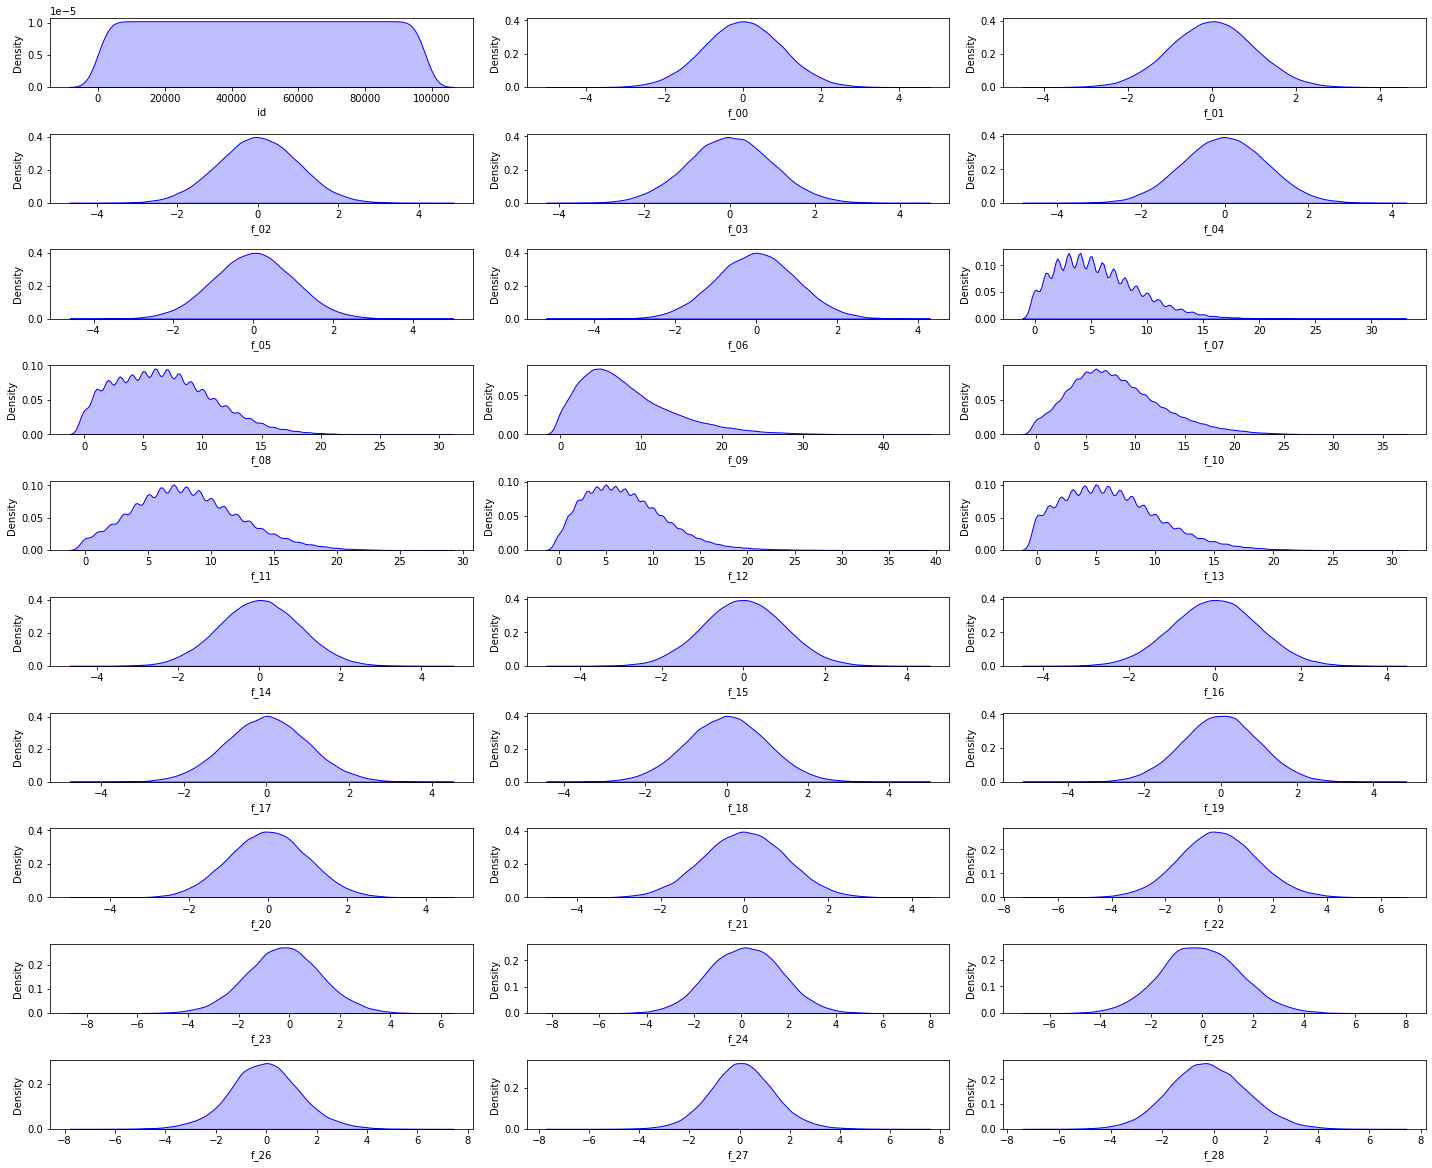

In [11]:
fig = plt.figure(figsize=(20,40))

for i, col in enumerate(df.columns):
    plt.subplot(25,3, i+1)
    sns.kdeplot(df[col], fill=True, color='blue')
# kdeplot : カーネル密度推定グラフを表示(seaborn)
    
plt.tight_layout()

In [12]:
# lets divide the dataset into two subsets
subset1 = df.drop(['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], axis = 1)
subset2 = df[['f_07','f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']].copy()

In [13]:
# Lets take a closer look at the subset1
subset1.drop('id', axis=1).describe().T.style.bar(subset=['mean'], color=px.colors.qualitative.Pastel[4])\
                                        .background_gradient(subset=['std'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
f_00,98000.000000,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.000000,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.000000,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.000000,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.000000,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.000000,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.000000,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_14,98000.000000,0.003413,0.998940,-4.377021,-0.671810,0.003536,0.678679,4.490521
f_15,98000.000000,-0.002639,1.001096,-4.535903,-0.677757,-0.004299,0.673859,4.270708
f_16,98000.000000,0.005404,1.003277,-4.182233,-0.671055,0.006535,0.680903,4.157538


# seaborn.heatmap()関数の主な引数:
・　数値を表示: 引数annot<br>
・　カラーバー表示・非表示: 引数cbar<br>
・　正方形で表示: 引数square<br>
・　最大値、最小値、中央値を指定: 引数vmax, vmin, center<br>
・　色（カラーマップ）を指定: 引数cmap<br>
・　文字列フォーマット　：　'.2g'（デフォルト）<br>
・　サイズを指定

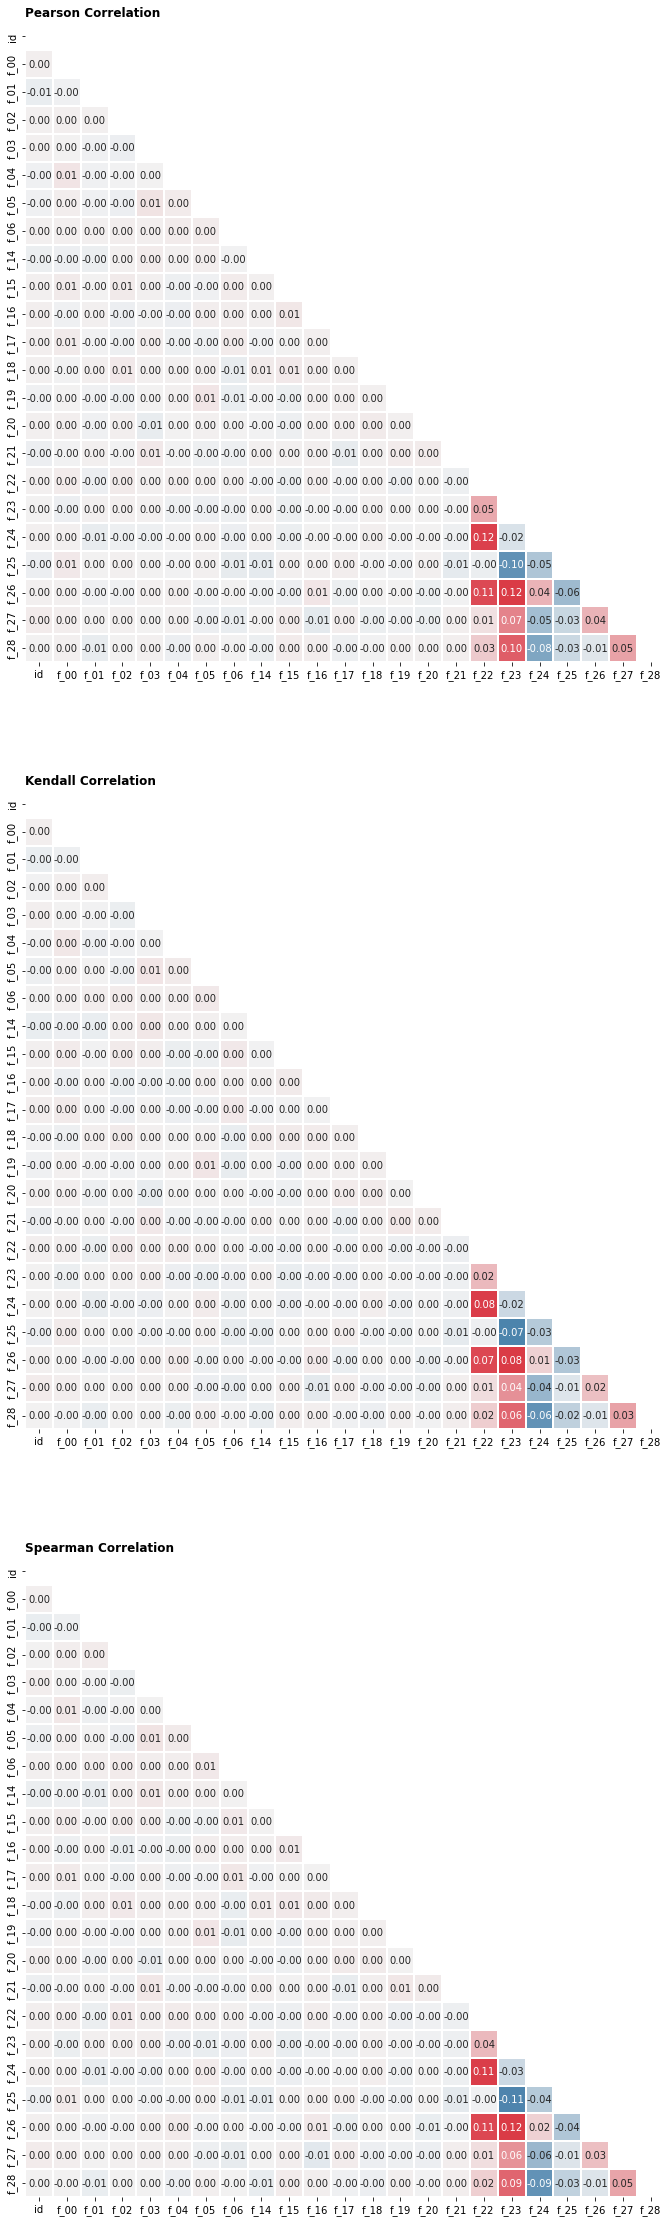

In [14]:
#plotting correlation for subset1
fig, ax = plt.subplots(3, 1, figsize=(120, 40))
corr = subset1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset1.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

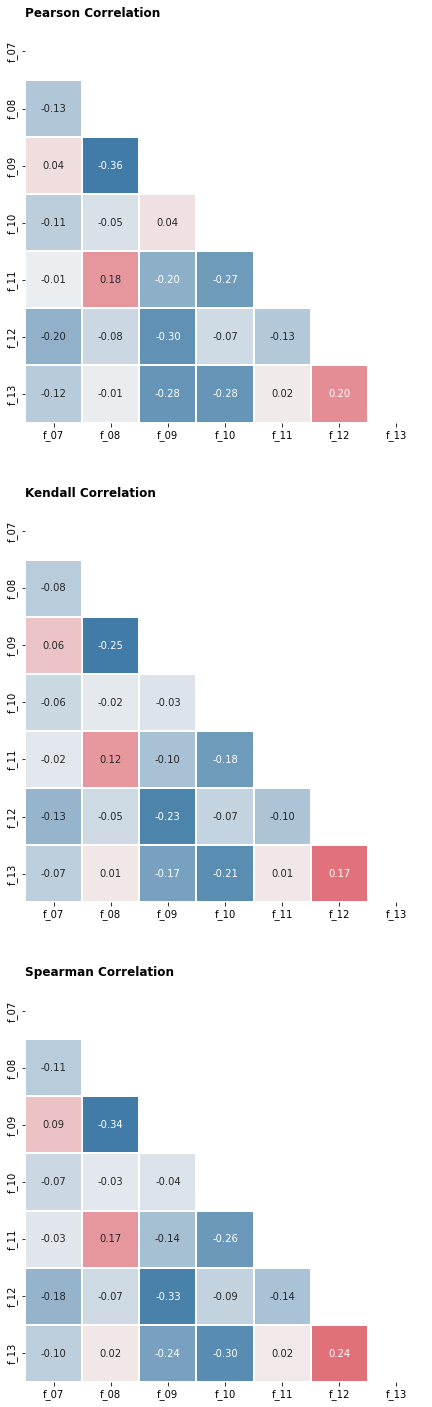

In [15]:
#plotting correlation for subset2
fig, ax = plt.subplots(3, 1, figsize=(50 , 25))
corr = subset2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(subset2.corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     
plt.show()

In [16]:
# scaling all the columns except ID
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop(columns="id"))
df_scaled = pd.DataFrame(data_scaled, index=df.index, columns=df.drop(columns="id").columns)
df_scaled.head().style.background_gradient()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,-0.650584,1.171053,-0.242797,-0.069441,-0.473738,0.360372,1.059236,-0.560604,-0.362972,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,-0.863341,-0.496771,2.012866,0.658704,0.588248,-0.393846,0.139972,-0.032414,0.478499,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,-0.012314,0.218011,-0.919496,1.144134,-0.684017,0.471450,0.343316,-0.289336,0.298074,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,-0.012314,0.218011,-0.242797,-0.554872,-0.393288,0.628715,-1.076425,-1.521504,-1.150052,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,-1.076098,-1.688074,1.336167,1.144134,-0.124288,-0.612271,-1.066274,0.441932,0.435485,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


# Identifying the optimal number of clusters

Elbow Method to determine the number of clusters to be formed:


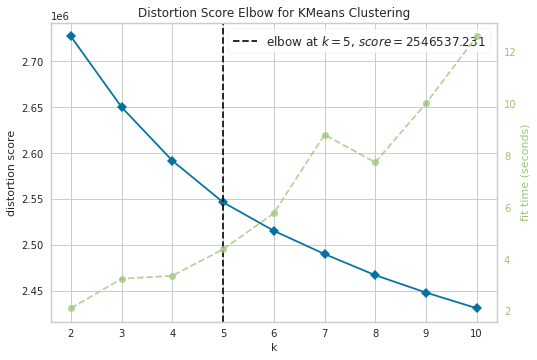

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans

# Yellowbrick for Elbow method and inter cluster distance map 
from yellowbrick.cluster import KElbowVisualizer  
from yellowbrick.cluster import InterclusterDistance 

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()  

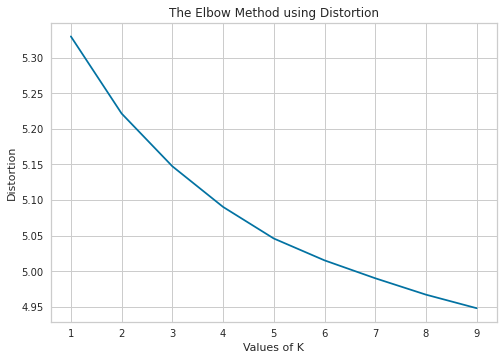

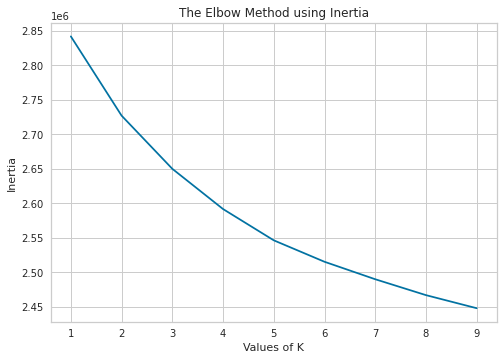

In [18]:
X = df_scaled
distortions = []
inertias = []

from scipy.spatial.distance import cdist
K = range(1, 10)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

### with distortions 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### Using the different values of Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [19]:
kmeanModel = KMeans(n_clusters=5).fit(X)
labels = kmeanModel.predict(X)

In [20]:
label_df = pd.DataFrame(labels)
label_df.shape

(98000, 1)

In [21]:
sample_df.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [22]:
sample_df['Predicted'] = label_df
sample_df.head()

,Id,Predicted
0,0,2
1,1,4
2,2,2
3,3,3
4,4,4


In [23]:
sample_df.to_csv('/kaggle/working/predicted.csv',index=False)